# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 


        Basic Regression Diagnosttics
        ------------------------------
        Slope:0.558
        Y-Intercept:6.333
        R-Squared: 0.972
        ------------------------------
   Model: Y = 0.558 * X + 6.333


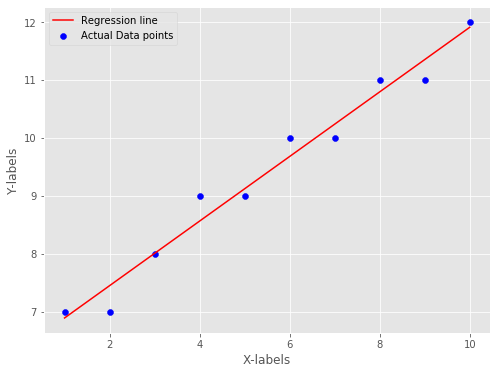

In [12]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

def calc_slope(xs,ys):
    x_bar = xs.mean()
    y_bar = ys.mean()
    x_y_bar = (xs*ys).mean()
    x2_bar = (xs*xs).mean()
    
    return (x_bar * y_bar - x_y_bar)/(x_bar**2 - x2_bar)

def best_fit(xs,ys):
    x_bar = xs.mean()
    y_bar = ys.mean()
    m_hat = calc_slope(xs,ys)
    c_hat = y_bar - (m_hat * x_bar)
    return m_hat, c_hat

def reg_line (m, c, xs):
    y = m*xs + c
    return y

def sq_err(y_real, y_predicted):
    """
    input
    y_real : true y values
    y_predicted : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    y_y_hat = np.sum((y_real - y_predicted)**2)
    
    return round(y_y_hat, 3)

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    sse = sq_err(y_real, y_predicted)
    y_bar = np.mean(y_real)
    sst = sq_err(y_real, np.full_like(y_real, fill_value = y_bar))
    return(1 - (sse/sst))


X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


def simple_linear(sx,sy):
    beta_1, beta_0 = best_fit(sx,sy) # Caculated the slope and y-intersect
    regression_line = reg_line (beta_1, beta_0, sx) # Caculated the y_hat (predicted y)
    R_squared = r_squared(sy, regression_line) # calculated the R**2 (Coefficient of correlation)
    
    print("""
        Basic Regression Diagnosttics
        ------------------------------
        Slope:{}
        Y-Intercept:{}
        R-Squared: {}
        ------------------------------""".
         format(round(beta_1,3), round(beta_0,3), round(R_squared,3)))
    print("   Model: Y = {} * X + {}".format(round(beta_1,3), round(beta_0,3)))
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.gca()
    ax.scatter(sx,sy, color = "blue", label = "Actual Data points")
    ax.plot(sx,regression_line, color = 'red', label = "Regression line")
    ax.legend()
    plt.xlabel('X-labels')
    plt.ylabel('Y-labels')
    return ax, beta_1, beta_0, R_squared

ax, m, c, r2 = simple_linear(X,Y)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


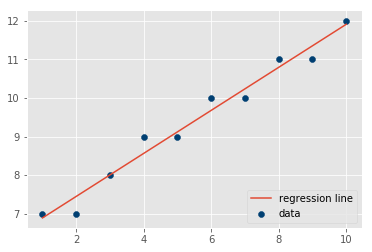

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

Text(0, 0.5, 'Y-labels')

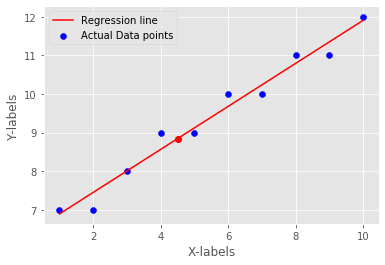

In [17]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x = 4.5
regression_line = reg_line (m, c, X)
y_hat = (m * x) + c 
plt.scatter(X,Y, color = "blue", label = "Actual Data points")
plt.plot(X,regression_line, color = 'red', label = "Regression line")
plt.legend()
plt.plot(x, y_hat, 'ro')
plt.xlabel('X-labels')
plt.ylabel('Y-labels')


## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 